<a href="https://colab.research.google.com/github/WahyuKhairi06/BigData_2311531009_Wahyu-Khairi/blob/main/Praktikum%202/tugas%202%20praktikum_bigdata_pertemuan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [4]:
import requests
from bs4 import BeautifulSoup
import csv

In [5]:
#Menyimpan URL dasar website yang akan di-scrape.
base_url = "https://quotes.toscrape.com"
all_quotes_data = [] #Membuat list kosong untuk menyimpan data

#buat perulangan untuk membaca 3 halaman website quotestoscrape
for page in range(1, 4):
    url = base_url.format(page)
    response = requests.get(url)

#Parsing HTML hasil response agar bisa dicari elemennya.
    soup = BeautifulSoup(response.text, "html.parser")

#Mencari semua blok <div class="quote">
    quotes = soup.find_all("div", class_="quote")

#melakukan perulangan untuk mengambil quote, author dan juga tag pada website
    for quote in quotes:
        text = quote.find("span", class_="text").text
        author = quote.find("small", class_="author").text
        tags = [tag.text for tag in quote.find_all("a", class_="tag")]
        all_quotes_data.append({"Quote": text, "Author": author, "Tags": ", ".join(tags)}) #menyimpan data ke list

In [6]:
#menyimpan file kedalam CSV
with open("quotes2.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.DictWriter(file, fieldnames=["Quote", "Author", "Tags"])
    writer.writeheader()
    for quote_data in all_quotes_data:
        writer.writerow(quote_data)

print("Scraping selesai, data tersimpan di quotes2.csv")

Scraping selesai, data tersimpan di quotes2.csv


# **Analisa sederhana**

**penulis kutipan terbanyak**

In [8]:
import pandas as pd

df = pd.read_csv("quotes2.csv")

# Hitung jumlah kutipan per penulis
author_counts = df['Author'].value_counts()

# mencari siapa penulis terbanyak
most_prolific_author = author_counts.idxmax()
num_quotes = author_counts.max()

print(f"Penulis dengan jumlah kutipan terbanyak adalah: {most_prolific_author} dengan {num_quotes} kutipan.")

Penulis dengan jumlah kutipan terbanyak adalah: Albert Einstein dengan 9 kutipan.


**tag yang sering muncul**

In [9]:
# memisahkan tag dan menghitung quantity tags
all_tags = df['Tags'].str.split(', ').explode()
tag_counts = all_tags.value_counts()

# menghitung tag dan juga mengurutkan nya dari yang terbanyak
print("Tag yang paling sering muncul (diurutkan):")
display(tag_counts)

Tag yang paling sering muncul (diurutkan):


,count
Tags,
inspirational,9
life,6
humor,6
deep-thoughts,3
thinking,3
change,3
choices,3
abilities,3
live,3


# **visualisasi**

/tmp/ipython-input-4240449573.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tags.index, y=top_tags.values, palette="viridis")


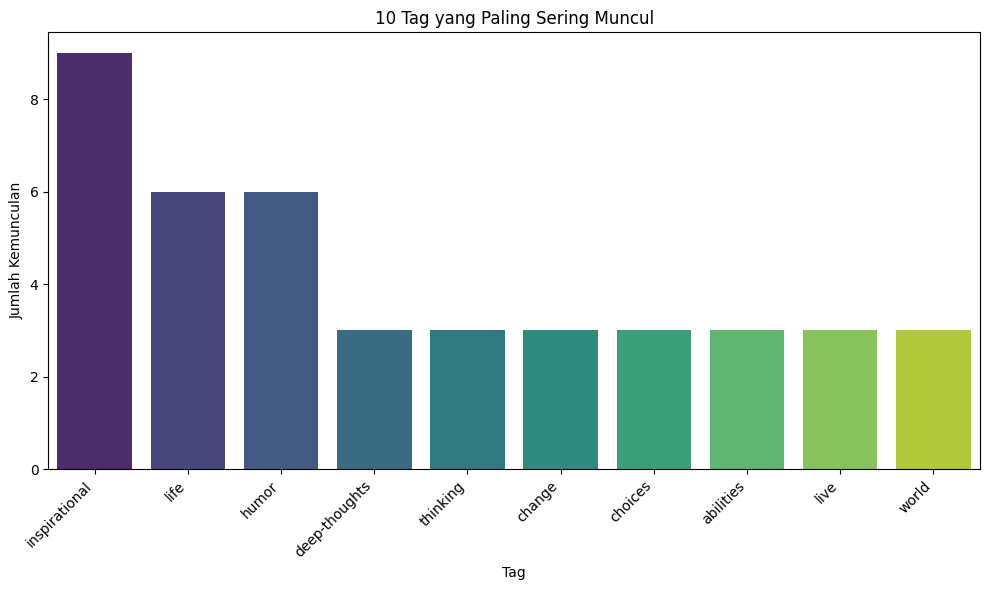

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 10 tag teratas
top_tags = tag_counts.head(10)

# Buat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tags.index, y=top_tags.values, palette="viridis")
plt.title('10 Tag yang Paling Sering Muncul')
plt.xlabel('Tag')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()